In [1]:
class Graph:
    def __init__(self, gdict=None):
        if gdict is None:
            gdict = {}
        self.gdict = gdict
    
    def addEdge(self, vertex, edge):
        self.gdict[vertex].append(edge)
    
    def bfs(self, vertex):
        visited = [vertex]
        queue = [vertex]
        while queue:
            deVertex = queue.pop(0)
            print(deVertex)
            for adjacentVertex in self.gdict[deVertex]:
                if adjacentVertex not in visited:
                    visited.append(adjacentVertex)
                    queue.append(adjacentVertex)
    def dfs(self, vertex):
        visited = [vertex]
        stack = [vertex]
        while stack:
            popVertex = stack.pop()
            print(popVertex)
            for adjacentVertex in self.gdict[popVertex]:
                if adjacentVertex not in visited:
                    visited.append(adjacentVertex)
                    stack.append(adjacentVertex)

customDict = { "a" : ["b","c"],
            "b" : ["a", "d", "e"],
            "c" : ["a", "e"],
            "d" : ["b", "e", "f"],
            "e" : ["d", "f", "c"],
            "f" : ["d", "e"]
               }



g = Graph(customDict)
g.dfs("a")

a
c
e
f
d
b


In [16]:
#TOPGOLOGICALSORT
from collections import defaultdict

class Graph:
    def __init__(self, numberofVertices):
        self.graph = defaultdict(list)
        self.numberofVertices = numberofVertices
    
    def addEdge(self, vertex, edge):
        self.graph[vertex].append(edge)
    
    def topogologicalSortUtil(self, v, visited, stack):
        visited.append(v)

        for i in self.graph[v]:
            if i not in visited:
                self.topogologicalSortUtil(i, visited, stack)
        
        stack.insert(0, v)
    
    def topologicalSort(self):

        visited = []
        stack = []

        for k in list(self.graph):
            if k not in visited:
                self.topogologicalSortUtil(k, visited, stack)
        
        print(stack)
    
    

customGraph = Graph(0)
customGraph.addEdge("A", "C")
customGraph.addEdge("C", "E")
customGraph.addEdge("E", "H")
customGraph.addEdge("E", "F")
customGraph.addEdge("F", "G")
customGraph.addEdge("B", "D")
customGraph.addEdge("B", "C")
customGraph.addEdge("D", "F")

customGraph.topologicalSort()

['B', 'D', 'A', 'C', 'E', 'F', 'G', 'H']


In [6]:
#SSSP
class Graph:
    def __init__(self, gdict=None):
        if gdict is None:
            gdict = {}
        self.gdict = gdict
    
    def bfs(self, start, end):
        queue = []
        queue.append([start])
        while queue:
            path = queue.pop(0)
            node = path[-1]
            if node == end:
                return path
            for adjacent in self.gdict.get(node, []):
                new_path = list(path)
                new_path.append(adjacent)
                queue.append(new_path)

customDict = { "a" : ["b", "c"],
               "b" : ["d", "g"],
               "c" : ["d", "e"],
               "d" : ["f"],
               "e" : ["f"],
               "g" : ["f"]
            }

g = Graph(customDict)
print(g.bfs("a", "f"))

['a', 'b', 'd', 'f']


In [17]:
from collections import defaultdict

class Graph:
    def __init__(self):
        self.nodes = set()
        self.edges = defaultdict(list)
        self.distances = {}
    
    def addNode(self,value):
        self.nodes.add(value)
    
    def addEdge(self, fromNode, toNode, distance):
        self.edges[fromNode].append(toNode)
        self.distances[(fromNode, toNode)] = distance


def dijkstra(graph, initial):
    visited = {initial : 0}
    path = defaultdict(list)

    nodes = set(graph.nodes)

    while nodes:
        minNode = None
        for node in nodes:
            if node in visited:
                if minNode is None:
                    minNode = node
                elif visited[node] < visited[minNode]:
                    minNode = node
        if minNode is None:
            break

        nodes.remove(minNode)
        currentWeight = visited[minNode]

        for edge in graph.edges[minNode]:
            weight = currentWeight + graph.distances[(minNode, edge)]
            if edge not in visited or weight < visited[edge]:
                visited[edge] = weight
                path[edge].append(minNode)
    
    return visited, path

customGraph = Graph()
customGraph.addNode("A")
customGraph.addNode("B")
customGraph.addNode("C")
customGraph.addNode("D")
customGraph.addNode("E")
customGraph.addNode("F")
customGraph.addNode("G")
customGraph.addEdge("A", "B", 2)
customGraph.addEdge("A", "C", 5)
customGraph.addEdge("B", "C", 6)
customGraph.addEdge("B", "D", 1)
customGraph.addEdge("B", "E", 3)
customGraph.addEdge("C", "F", 8)
customGraph.addEdge("D", "E", 4)
customGraph.addEdge("E", "G", 9)
customGraph.addEdge("F", "G", 7)

print(dijkstra(customGraph, "A"))


# See change the distance from d to e to 1 and from b to e to 6.
# then to get to e from a ,
# shortest path should be a b d e
# but your code is giving a b e

({'A': 0, 'B': 2, 'C': 5, 'D': 3, 'E': 5, 'G': 14, 'F': 13}, defaultdict(<class 'list'>, {'B': ['A'], 'C': ['A'], 'D': ['B'], 'E': ['B'], 'G': ['E'], 'F': ['C']}))


In [ ]:
class Graph:

    def __init__(self, vertices):
        self.V = vertices   
        self.graph = []     
        self.nodes = []

    def add_edge(self, s, d, w):
        self.graph.append([s, d, w])
    
    def addNode(self,value):
        self.nodes.append(value)

    def print_solution(self, dist):
        print("Vertex Distance from Source")
        for key, value in dist.items():
            print('  ' + key, ' :    ', value)
    
    def bellmanFord(self, src):
        dist = {i : float("Inf") for i in self.nodes}
        dist[src] = 0

        for _ in range(self.V-1):
            for s, d, w in self.graph:
                if dist[s] != float("Inf") and dist[s] + w < dist[d]:
                    dist[d] = dist[s] + w
        
        for s, d, w in self.graph:
            if dist[s] != float("Inf") and dist[s] + w < dist[d]:
                print("Graph contains negative cycle")
                return
        

        self.print_solution(dist)

g = Graph(5)
g.addNode("A")
g.addNode("B")
g.addNode("C")
g.addNode("D")
g.addNode("E")
g.add_edge("A", "C", 6)
g.add_edge("A", "D", 6)
g.add_edge("B", "A", 3)
g.add_edge("C", "D", 1)
g.add_edge("D", "C", 2)
g.add_edge("D", "B", 1)
g.add_edge("E", "B", 4)
g.add_edge("E", "D", 2)
g.bellmanFord("E")

In [7]:
import sys
class Graph:
    def __init__(self, vertexNum, edges, nodes):
        self.edges = edges
        self.nodes = nodes
        self.vertexNum = vertexNum
        self.MST = []
    
    def printSolution(self):
        print("Edge : Weight")
        for s, d, w in self.MST:
            print("%s -> %s: %s" % (s, d, w))
    
    def primsAlgo(self):
        visited = [0]*self.vertexNum
        edgeNum=0
        visited[0]=True
        while edgeNum<self.vertexNum-1:
            min = sys.maxsize
            for i in range(self.vertexNum):
                if visited[i]:
                    for j in range(self.vertexNum):
                        if ((not visited[j]) and self.edges[i][j]):
                            if min > self.edges[i][j]:
                                min = self.edges[i][j]
                                s = i
                                d = j
            self.MST.append([self.nodes[s], self.nodes[d], self.edges[s][d]])
            visited[d] = True
            edgeNum += 1
        self.printSolution()



edges = [[0, 10, 20, 0, 0],
		[10, 0, 30, 5, 0],
		[20, 30, 0, 15, 6],
		[0, 5, 15, 0, 8],
		[0, 0, 6, 8, 0]]
nodes = ["A","B","C","D","E"]
g = Graph(5, edges, nodes)
g.primsAlgo()

Edge : Weight
A -> B: 10
B -> D: 5
D -> E: 8
E -> C: 6


In [10]:
import DisjointSet as dst

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = []
        self.nodes = []
        self.MST = []

    def addEdge(self, s, d, w):
        self.graph.append([s, d, w])
    
    def addNode(self, value):
        self.nodes.append(value)
    
    def printSolution(self,s,d,w):
        for s, d, w in self.MST:
            print("%s - %s: %s" % (s, d, w))
    
    def kruskalAlgo(self):
        i, e = 0, 0
        ds = dst.DisjointSet(self.nodes)
        self.graph = sorted(self.graph, key=lambda item: item[2])
        while e < self.V - 1:
            s, d, w = self.graph[i]
            i += 1
            x = ds.find(s)
            y = ds.find(d)
            if x != y:
                e += 1
                self.MST.append([s,d,w])
                ds.union(x,y)
        self.printSolution(s,d,w)

g = Graph(5)
g.addNode("A")
g.addNode("B")
g.addNode("C")
g.addNode("D")
g.addNode("E")
g.addEdge("A", "B", 5)
g.addEdge("A", "C", 13)
g.addEdge("A", "E", 15)
g.addEdge("B", "A", 5)
g.addEdge("B", "C", 10)
g.addEdge("B", "D", 8)
g.addEdge("C", "A", 13)
g.addEdge("C", "B", 10)
g.addEdge("C", "E", 20)
g.addEdge("C", "D", 6)
g.addEdge("D", "B", 8)
g.addEdge("D", "C", 6)
g.addEdge("E", "A", 15)
g.addEdge("E", "C", 20)

g.kruskalAlgo()

A - B: 5
C - D: 6
B - D: 8
A - E: 15


In [9]:
from collections import defaultdict

class Graph:
    def __init__(self):
        self.nodes = set()
        self.edges = defaultdict(list)
        self.distances = {}
    
    def addNode(self,value):
        self.nodes.add(value)
    
    def addEdge(self, fromNode, toNode, distance):
        self.edges[fromNode].append(toNode)
        self.distances[(fromNode, toNode)] = distance


def dijkstra(graph, initial):
    visited = {initial : 0}
    path = defaultdict(list)

    nodes = set(graph.nodes)

    while nodes:
        minNode = None
        for node in nodes:
            if node in visited:
                if minNode is None:
                    minNode = node
                elif visited[node] < visited[minNode]:
                    minNode = node
        if minNode is None:
            break

        nodes.remove(minNode)
        currentWeight = visited[minNode]

        for edge in graph.edges[minNode]:
            weight = currentWeight + graph.distances[(minNode, edge)]
            if edge not in visited or weight < visited[edge]:
                visited[edge] = weight
                path[edge].append(minNode)
    
    return visited, path

customGraph = Graph()
customGraph.addNode("A")
customGraph.addNode("B")
customGraph.addNode("C")
customGraph.addNode("D")
customGraph.addNode("E")
customGraph.addNode("F")
customGraph.addNode("G")
customGraph.addEdge("A", "B", 2)
customGraph.addEdge("A", "C", 5)
customGraph.addEdge("B", "C", 6)
customGraph.addEdge("B", "D", 1)
customGraph.addEdge("B", "E", 3)
customGraph.addEdge("C", "F", 8)
customGraph.addEdge("D", "E", 4)
customGraph.addEdge("E", "G", 9)
customGraph.addEdge("F", "G", 7)

print(dijkstra(customGraph, "A"))

({'A': 0, 'B': 2, 'C': 5, 'D': 3, 'E': 5, 'G': 14, 'F': 13}, defaultdict(<class 'list'>, {'B': ['A'], 'C': ['A'], 'D': ['B'], 'E': ['B'], 'G': ['E'], 'F': ['C']}))


In [1]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


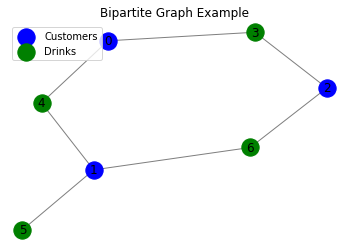

In [3]:
#biparite graph
import networkx as nx
import matplotlib.pyplot as plt

# Create a new bipartite graph
G = nx.Graph()

# Define sets of nodes (customers and drinks)
customers = [0, 1, 2]
drinks = [3, 4, 5, 6]

# Add nodes with the `bipartite` attribute to distinguish sets
G.add_nodes_from(customers, bipartite=0)
G.add_nodes_from(drinks, bipartite=1)

# Define edges based on preferences
edges = [
    (0, 3), (0, 4),  # Customer 0 likes drinks 3 and 4
    (1, 4), (1, 5), (1, 6),  # Customer 1 likes drinks 4, 5, and 6
    (2, 3), (2, 6)  # Customer 2 likes drinks 3 and 6
]

G.add_edges_from(edges)

# Separate nodes into two sets for bipartite layout
top_nodes = customers
bottom_nodes = drinks

# Draw the bipartite graph
pos = nx.spring_layout(G)  # Use spring layout for visualization

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, nodelist=top_nodes, node_color='b', label='Customers')
nx.draw_networkx_nodes(G, pos, nodelist=bottom_nodes, node_color='g', label='Drinks')
nx.draw_networkx_edges(G, pos, edgelist=edges, width=1.0, alpha=0.5)

# Add labels and legend
nx.draw_networkx_labels(G, pos)
plt.legend()

# Display the graph
plt.title('Bipartite Graph Example')
plt.axis('off')
plt.show()



In [6]:
import networkx as nx

def min_drinks_to_satisfy_customers(preferences, num_drinks, num_customers):
    # Create a bipartite graph
    G = nx.Graph()
    
    # Customer nodes are numbered from 0 to num_customers-1
    # Drink nodes are numbered from num_customers to num_customers + num_drinks - 1
    customer_nodes = range(num_customers)
    drink_nodes = range(num_customers, num_customers + num_drinks)
    print(customer_nodes)
    print(drink_nodes)
    # Add nodes
    G.add_nodes_from(customer_nodes, bipartite=0)
    G.add_nodes_from(drink_nodes, bipartite=1)
    
    # Add edges
    for cust_idx, drinks in enumerate(preferences):
        for drink in drinks:
            G.add_edge(cust_idx, num_customers + drink)
    
    # Find maximum matching in the bipartite graph
    max_matching = nx.bipartite.maximum_matching(G, customer_nodes)
    
    # Minimum number of drinks needed
    min_drinks_needed = num_customers - len(max_matching)
    
    return min_drinks_needed

# Example usage:
preferences = [
    [0, 1, 3, 6],
    [1, 4, 7],
    [2, 4, 7, 5],
    [3, 2, 5],
]
num_drinks = 9
num_customers = 5

result = min_drinks_to_satisfy_customers(preferences, num_drinks, num_customers)
print(result)  # Output: 2


range(0, 5)
range(5, 14)
-3


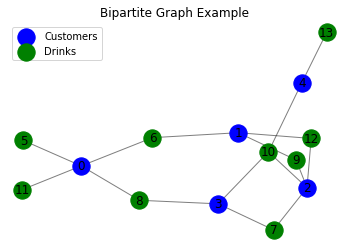

-5


In [7]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_bipartite_graph(preferences, num_drinks, num_customers):
    # Create a new bipartite graph
    G = nx.Graph()

    # Customer nodes are numbered from 0 to num_customers-1
    # Drink nodes are numbered from num_customers to num_customers + num_drinks - 1
    customer_nodes = range(num_customers)
    drink_nodes = range(num_customers, num_customers + num_drinks)

    # Add nodes with the `bipartite` attribute to distinguish sets
    G.add_nodes_from(customer_nodes, bipartite=0)
    G.add_nodes_from(drink_nodes, bipartite=1)

    # Add edges based on preferences
    for cust_idx, drinks in enumerate(preferences):
        for drink in drinks:
            G.add_edge(cust_idx, num_customers + drink)

    # Separate nodes into two sets for bipartite layout
    top_nodes = customer_nodes
    bottom_nodes = drink_nodes

    # Draw the bipartite graph
    pos = nx.spring_layout(G)

    # Draw nodes and edges
    nx.draw_networkx_nodes(G, pos, nodelist=top_nodes, node_color='b', label='Customers')
    nx.draw_networkx_nodes(G, pos, nodelist=bottom_nodes, node_color='g', label='Drinks')
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

    # Add labels and legend
    nx.draw_networkx_labels(G, pos)
    plt.legend()

    # Display the graph
    plt.title('Bipartite Graph Example')
    plt.axis('off')
    plt.show()
    


# Example usage:
preferences = [
    [0, 1, 3, 6],
    [1, 4, 7],
    [2, 4, 7, 5],
    [3, 2, 5],
    [5, 8]
]
num_drinks = 9
num_customers = 5

draw_bipartite_graph(preferences, num_drinks, num_customers)




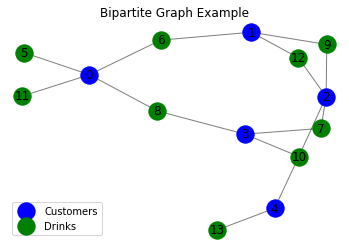

-5


In [9]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_bipartite_graph(preferences, num_drinks, num_customers):
    # Create a new bipartite graph
    G = nx.Graph()

    # Customer nodes are numbered from 0 to num_customers-1
    # Drink nodes are numbered from num_customers to num_customers + num_drinks - 1
    customer_nodes = range(num_customers)
    drink_nodes = range(num_customers, num_customers + num_drinks)

    # Add nodes with the `bipartite` attribute to distinguish sets
    G.add_nodes_from(customer_nodes, bipartite=0)
    G.add_nodes_from(drink_nodes, bipartite=1)

    # Add edges based on preferences
    for cust_idx, drinks in enumerate(preferences):
        for drink in drinks:
            G.add_edge(cust_idx, num_customers + drink)

    # Separate nodes into two sets for bipartite layout
    top_nodes = customer_nodes
    bottom_nodes = drink_nodes

    # Draw the bipartite graph
    pos = nx.spring_layout(G)

    # Draw nodes and edges
    nx.draw_networkx_nodes(G, pos, nodelist=top_nodes, node_color='b', label='Customers')
    nx.draw_networkx_nodes(G, pos, nodelist=bottom_nodes, node_color='g', label='Drinks')
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

    # Add labels and legend
    nx.draw_networkx_labels(G, pos)
    plt.legend()

    # Display the graph
    plt.title('Bipartite Graph Example')
    plt.axis('off')
    plt.show()
    
    # Find maximum matching in the bipartite graph
    max_matching = nx.bipartite.maximum_matching(G, customer_nodes)
    
    # Minimum number of drinks needed
    min_drinks_needed = num_customers - len(max_matching)
    
    print(min_drinks_needed)

# Example usage:
preferences = [
    [0, 1, 3, 6],
    [1, 4, 7],
    [2, 4, 7, 5],
    [3, 2, 5],
    [5, 8]
]
num_drinks = 9
num_customers = 5

draw_bipartite_graph(preferences, num_drinks, num_customers)


In [16]:
def print_least_number(array, num_drinks, num_customers):
    # Create a matrix to track customer preferences
    arr = [[0] * (num_customers + 1) for _ in range(num_drinks)]

    # Fill the arr matrix based on customer preferences
    for i in range(num_customers):
        for j in range(len(array[i])):
            ind = array[i][j]
            arr[ind][i] = 1

    # Calculate the number of customers each drink can serve and store in the last column of arr
    for i in range(num_drinks):
        arr[i][num_customers] = sum(arr[i][:num_customers])

    p = num_customers  # Counter variable to track the number of customers left
    count = 0  # Counter variable to track the output

    # Iterate until all customers are satisfied
    while p > 0:
        index = 0
        maxim = 0

        # Find the row index which has the maximum number of customers served
        for i in range(num_drinks):
            if arr[i][num_customers] > maxim:
                maxim = arr[i][num_customers]
                index = i

        count += 1  # Increase count as we found one drink which serves the maximum number of customers
        p -= maxim  # Update the remaining customers

        # Eliminate the already counted drinks and customers and recalculate the new sums
        for i in range(num_customers):
            if arr[index][i] == 1:
                for j in range(num_drinks):
                    if arr[j][i] == 1:
                        arr[j][i] = 0
                        arr[j][num_customers] -= 1

    return count

# Example usage:
preferences = [
    [0, 1, 6],
    [1],
    [2, 4, 7],
    [3],
    [5, 8]
]
num_drinks = 9
num_customers = 5

result = print_least_number(preferences, num_drinks, num_customers)
print(f"Output = {result}")  # Output = 2


Output = 4
